In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
"""
读取文件，以逗号未分割点
取所有行，和第一列到倒数第二列
取所有行，和最后一列
"""
xy = np.loadtxt('database\diabetes.csv.gz', delimiter=',', dtype=np.float32)
x_data = torch.from_numpy(xy[:, :-1]) # 第一个‘：’是指读取所有行，第二个‘：’是指从第一列开始，最后一列不要
print("input data.shape", x_data.shape)
y_data = torch.from_numpy(xy[:, [-1]]) # [-1] 最后得到的是个矩阵

input data.shape torch.Size([759, 8])


<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\yangshiru\AppData\Local\Temp\ipykernel_9400\2758088632.py:6: SyntaxWarning: invalid escape sequence '\d'
  xy = np.loadtxt('database\diabetes.csv.gz', delimiter=',', dtype=np.float32)


In [3]:

class Model(torch.nn.Module):
    """
    super继承Module库
    线性变换；
    8维指的是8个特征-6维是6个特征；8个权重-6个权重
    这是线性网络
    输入数据为8维-输出6维
    输入数据为6维-输出4维
    输入数据为4维-输出2维
    输入数据为2维-输出1维
    调用sigmoid函数，对数据判断
    """
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 2)
        self.linear4 = torch.nn.Linear(2, 1)
        self.sigmoid = torch.nn.Sigmoid()
 
    def forward(self, x):
        """
        :param x:输入数据
        :return:预测值
        """
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        x = self.sigmoid(self.linear4(x))
        return x

c:\Users\yangshiru\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Text(0.5, 0, 'epoch')

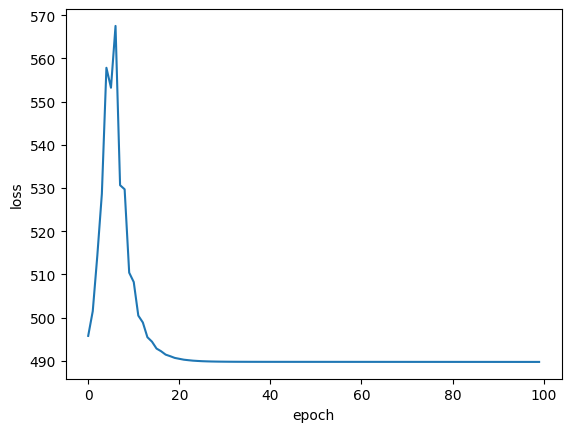

In [4]:
"""
模型实例化
调用BCELoss函数--给criterion函数
使用SGD优化器，模型参数初始化（parameters()），学习率为0.01
"""
model = Model()
criterion = torch.nn.BCELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Adam优化器
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

epoch_list = []
loss_list = []

for epoch in range(100):
    """
    遍历100次
    将特征值传入模型，返回预测值（张量）
    传入预测和真实值，通过criterion函数，返回损失函数
    输出  当前次数  和  损失函数的高精度
    优化器中梯度值 参数归零
    反向传播
    通过优化器函数，optimizer.step函数进行更新权值w和偏置b，以及梯度值
    """
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_list.append(epoch)
    loss_list.append(loss.item())

plt.plot(epoch_list, loss_list)
plt.ylabel('loss')
plt.xlabel('epoch')

##### SGD（随机梯度下降）
基本思想：SGD在每一步更新中仅使用一个（或一小批）样本来计算梯度，而不是使用整个数据集。这种方法可以显著减少计算量，使得训练大规模数据集变得可行。  
学习率：SGD通常需要手动调整学习率，并且可能会使用如学习率衰减这样的技巧来帮助模型收敛。学习率的选择对SGD的性能影响很大。
收敛速度：SGD的收敛速度通常比较慢，尤其是在接近最小值的平坦区域。  
泛化能力：研究表明，由于SGD的噪声更大，它可能有助于模型找到泛化性能更好的解。

##### Adam（自适应矩估计）
基本思想：Adam是一种自适应学习率的优化算法，它结合了动量（Momentum）和RMSprop的优点。Adam会为不同的参数计算不同的自适应学习率。  
学习率：Adam自动调整学习率，通常不需要像SGD那样手动微调学习率，这使得Adam在很多情况下都能较快地收敛。  
收敛速度：由于自适应学习率的特性，Adam在初期训练阶段通常比SGD收敛得更快。  
泛化能力：尽管Adam在许多任务中都显示出了较快的收敛速度，但一些研究表明，对于某些问题，Adam可能导致过拟合，泛化能力不如SGD。

##### 应用场景
Adam：由于其易用性和快速收敛的特点，Adam非常适合在需要快速得到结果的场景中使用，特别是在计算资源有限或模型较复杂时。  
SGD：如果模型训练时出现过拟合，或者当你有足够的时间和资源来精细调整学习率时，SGD可能是更好的选择。对于大规模分布式训练，SGD的泛化能力可能更优。
